Dataset : Covid-19 in Indonesia
1. Membuat scatter plot 5 total kasus Covid-19 terbanyak lalu dilihat dari kasus aktif terbaru, kematian terbaru, sembuh terbaru per tanggal 09 Juli 2021
2. Memprediksi Covid-19 di Kalimantan Timur bulan Juli 2021 menggunakan model SVR 3 kernel (linier, polynomial, dan RBF) dan Linear Regression

Nama Kelompok :
1. Kharismaharani Aisyah Putri (19051397015)
2. Nur Wulan C (19051397010)
3. Zulfa Alfin N (19051397024)

Kelas : D4 Manajemen Informatika 2019'A

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
#membaca file Covid-19.csv
df = pd.read_csv('Covid-19.csv')
df.head(20)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN
5,1/13/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,0.00,NaN,NaN,NaN,NaN
6,1/14/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN
7,1/15/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN
8,1/16/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN
9,1/17/2020,ID-JI,Jawa Timur,0,0,4,-4,9,13,60,-64,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,666.67%,1.0,1.00,NaN,NaN,NaN,NaN


In [ ]:
# menghapus kolom (axis=1) dengan semua data bernilai null dan kolom yang tidak diperlukan
df = df.drop(['City or Regency','Name','Item','Kind','Hidden','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate', 'Total Deaths','Total Recovered',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths', 
                'Area (km2)','Population','Population Density','New Cases', 'Total Active Cases',
                'Longitude','Latitude'],axis = 1)
df.dropna(how = "all")
df.head(20)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
0,1/8/2020,Jawa Timur,3,1,5,9,Province
1,1/9/2020,Jawa Timur,1,23,-24,9,Province
2,1/10/2020,Jawa Timur,1,14,-15,9,Province
3,1/11/2020,Jawa Timur,3,8,-11,9,Province
4,1/12/2020,Jawa Timur,3,1,-4,9,Province
5,1/13/2020,Jawa Timur,0,0,0,9,Province
6,1/14/2020,Jawa Timur,0,0,0,9,Province
7,1/15/2020,Jawa Timur,0,0,0,9,Province
8,1/16/2020,Jawa Timur,0,0,0,9,Province
9,1/17/2020,Jawa Timur,0,4,-4,9,Province


In [ ]:
#memanggil kolom location level yang Provinsi
df = df[df['Location Level'] == 'Province']
df.tail(20)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
16263,7/9/2021,Kalimantan Timur,18,433,570,83762,Province
16264,7/9/2021,Kalimantan Utara,1,20,147,14274,Province
16265,7/9/2021,Kepulauan Bangka Belitung,5,122,160,23188,Province
16266,7/9/2021,Kepulauan Riau,11,141,573,30637,Province
16267,7/9/2021,Lampung,7,76,300,24378,Province
16268,7/9/2021,Maluku,3,0,207,10465,Province
16269,7/9/2021,Maluku Utara,1,33,137,6526,Province
16270,7/9/2021,Nusa Tenggara Barat,0,3,5,13466,Province
16271,7/9/2021,Nusa Tenggara Timur,4,90,126,22933,Province
16272,7/9/2021,Papua,0,21,104,21503,Province


Membuat Scatter plot 5 Teratas Kasus Covid-19 (Kasus Aktif Baru, Kematian Baru, Sembuh Baru) per tanggal 09 Juli 2021 berdasarkan banyaknya jumlah total kasus

In [ ]:
#menghapus data duplikat di kolom Lokasi dan menampilkan data terakhir (09 Juli 2021)
df2 = df.drop_duplicates(subset='Location', keep='last')
df2.head(34)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
16249,7/9/2021,Aceh,13,108,-41,20140,Province
16250,7/9/2021,Bali,6,0,668,54079,Province
16251,7/9/2021,Banten,4,49,461,61689,Province
16252,7/9/2021,Bengkulu,0,67,34,11671,Province
16253,7/9/2021,DKI Jakarta,138,15022,-2048,636383,Province
16254,7/9/2021,Daerah Istimewa Yogyakarta,44,902,719,72560,Province
16256,7/9/2021,Jambi,2,118,66,13935,Province
16257,7/9/2021,Jawa Barat,160,4974,2265,440379,Province
16258,7/9/2021,Jawa Tengah,202,3042,1286,285348,Province
16259,7/9/2021,Jawa Timur,168,1727,635,189705,Province


In [ ]:
#data Covid-19 sort by Total Kasus
df2.sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
16253,7/9/2021,DKI Jakarta,138,15022,-2048,636383,Province
16257,7/9/2021,Jawa Barat,160,4974,2265,440379,Province
16258,7/9/2021,Jawa Tengah,202,3042,1286,285348,Province
16259,7/9/2021,Jawa Timur,168,1727,635,189705,Province
16263,7/9/2021,Kalimantan Timur,18,433,570,83762,Province
16274,7/9/2021,Riau,16,299,189,74899,Province
16254,7/9/2021,Daerah Istimewa Yogyakarta,44,902,719,72560,Province
16276,7/9/2021,Sulawesi Selatan,7,119,385,67280,Province
16251,7/9/2021,Banten,4,49,461,61689,Province
16280,7/9/2021,Sumatera Barat,10,275,433,55675,Province


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


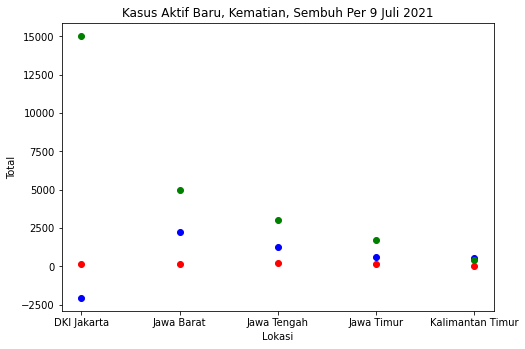

In [ ]:
#membuat scatter plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lokasi = df2[df.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5]
new_cases = df2[df.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['New Active Cases'].values[:5]
new_deaths = df2[df.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['New Deaths'].values[:5]
new_recover = df2[df.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['New Recovered'].values[:5]

# hubungan lokasi dan total
ax.scatter(lokasi,new_deaths,color='red')
ax.scatter(lokasi,new_cases,color='blue')
ax.scatter(lokasi,new_recover,color='green')


# set label X dan Y
ax.set_xlabel('Lokasi')
ax.set_ylabel('Total')
ax.set_title('Kasus Aktif Baru, Kematian, Sembuh Per 9 Juli 2021')

# tampilkan
plt.show()

#hasil : DKI Jakarta kasus aktif berkurang antara sembuh atau meninggal pada tanggal 9 Juli 2021

Memprediksi Kasus Kenaikan Covid-19 di Kalimantan Timur bulan Juli 2021 menggunakan model SVR 3 kernel dan Linear Regression

In [ ]:
#memanggil data untuk lokasi Kalimantan Timur
df3 = df[df['Location'] == 'Kalimantan Timur']
df3.tail(40)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
14937,5/31/2021,Kalimantan Timur,2,177,-90,71599,Province
14971,6/1/2021,Kalimantan Timur,0,73,17,71689,Province
15005,6/2/2021,Kalimantan Timur,5,106,-47,71753,Province
15039,6/3/2021,Kalimantan Timur,1,72,21,71847,Province
15073,6/4/2021,Kalimantan Timur,1,79,33,71960,Province
15107,6/5/2021,Kalimantan Timur,0,78,1,72039,Province
15141,6/6/2021,Kalimantan Timur,6,84,-15,72114,Province
15175,6/7/2021,Kalimantan Timur,7,87,-54,72154,Province
15209,6/8/2021,Kalimantan Timur,3,64,23,72244,Province
15243,6/9/2021,Kalimantan Timur,1,105,-22,72328,Province


In [ ]:
df3.count()

Date                483
Location            483
New Deaths          483
New Recovered       483
New Active Cases    483
Total Cases         483
Location Level      483
dtype: int64

In [ ]:
#menghapus data awal sampai 474 (total data ada 483 sehingga menampilkan bulan Juli 2021 saja)
df3.drop(df3.head(474).index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#membuat array kosong yang nantinya akan diisi data
dates = []
cases = []

In [ ]:
#melihat berapa jumlah baris dan kolom (9 data dan 7 kolom)
df3.shape

(9, 7)

In [ ]:
#menampilkan 1 data terakhir (data tes)
df3.tail(1)

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
16263,7/9/2021,Kalimantan Timur,18,433,570,83762,Province


In [ ]:
#memotong 1 data terakhir untuk pengecekan (data training)
df3 = df3.head(len(df3)-1)
df3

,Date,Location,New Deaths,New Recovered,New Active Cases,Total Cases,Location Level
15991,7/1/2021,Kalimantan Timur,11,111,473,77830,Province
16025,7/2/2021,Kalimantan Timur,10,138,513,78491,Province
16059,7/3/2021,Kalimantan Timur,15,297,310,79113,Province
16093,7/4/2021,Kalimantan Timur,18,289,431,79851,Province
16127,7/5/2021,Kalimantan Timur,19,223,186,80279,Province
16161,7/6/2021,Kalimantan Timur,18,234,474,81005,Province
16195,7/7/2021,Kalimantan Timur,24,325,408,81762,Province
16229,7/8/2021,Kalimantan Timur,30,236,713,82741,Province


In [ ]:
#melihat data setelah data dipisah
df3.shape

(8, 7)

In [ ]:
#data akan diproses berdasarkan tanggal dan kasus aktif baru
df_dates = df3.loc[:,'Date']
df_cases = df3.loc[:,'New Active Cases']

In [ ]:
#memanggil tanggal saja, sehingga bulan dan tahun tidak diikutsertakan
for date in df_dates:
  dates.append([int(date.split('/')[1])])

for total_cases in df_cases:
  cases.append(float(total_cases))

In [ ]:
#melihat data tanggal yang telah diproses pembersihan
print(dates)

[[1], [2], [3], [4], [5], [6], [7], [8]]


In [ ]:
#membuat grafik prediksi kasus Covid-19 di Kalimantan Timur
def predict_cases(dates, cases, x):
  svr_lin = SVR(kernel='linear', C=1000.0)
  svr_poly = SVR(kernel = 'poly', C=1000.0,degree=2)
  svr_rbf = SVR(kernel ='rbf', C=1000.0, gamma=0.15)
  lin_reg = LinearRegression()

  svr_lin.fit(dates,cases)
  svr_poly.fit(dates,cases)
  svr_rbf.fit(dates,cases)
  lin_reg.fit(dates,cases)

  plt.scatter(dates,cases,color='black', label='Data')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR POLY')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF') 
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')

  plt.xlabel('Date')
  plt.ylabel('Case')
  plt.title('Model SVR dengan 3 kernel dan Linear Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

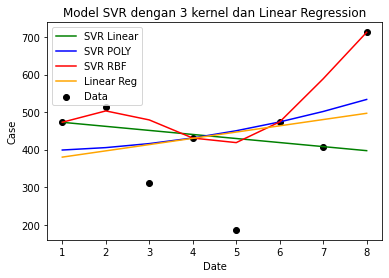

(731.8313281060045, 375.69999999999914, 610.865951293392, 530.297619047619)


In [ ]:
#melihat prediksi kasus aktif di Kalimantan Timur
predicted_case = predict_cases(dates,cases,[[10]])
print(predicted_case)

In [ ]:
#Maka, model yang paling sesuai yaitu menggunakan SVR RBF dengan kernel RBF yang hasilnya hampir mendekati dengan tanggal 09 Juli 2021 
#yaitu 570.2 (hampir sesuai dengan data tes)